In [1]:
import numpy as np
import matplotlib.pyplot as plt
from nbody import * 

# The `Particles` class

We could write a `Particles` python class to handle the particle information.
The class contains several physical properties, including tag, mass, position, velocity, acceleration, and time.

For our own convenience, we want to have the below data type to handle the N-body simulation:

In [2]:
time          = 0    # the starting  time
num_particles = 100  # number of particles
masses        = np.ones((num_particles,1))
positions     = np.zeros((num_particles,3)) # 3 directions
velocities    = np.zeros((num_particles,3))
accelerations = np.zeros((num_particles,3))
tags          = np.linspace(1,num_particles,num_particles)

Note that, the mass is setting to a Nx1 martrix.\
The reason to use Nx1 matrix but not a 1D numpy array is because mass x velcoity is the momentum\
and only Nx1 matrix could multiple with an Nx3 matrix.

The particles class can be initialized by

In [3]:
particles = Particles(N=num_particles)

In [4]:
# particles.masses = np.ones((num_particles,1))
particles.positions = np.random.rand(num_particles, 3)
particles.velocities = np.random.rand(num_particles, 3)
particles.accelerations = np.random.rand(num_particles, 3)
particles.tags = np.linspace(1,num_particles,num_particles)

Make sure your code will check the shape of your inputs. It must return errors when setting an incorrect shape.

In [5]:
# make sure the below codes will return an error. uncomment each line to test

particles.masses = np.ones(num_particles)
# particles.positions = np.random.rand(199, 3)
# particles.velocities = np.random.rand(500, 3)
# particles.accelerations = np.random.rand(num_particles, 2)
# particles.tags = np.linspace(1,num_particles,500)

# Add (remove) more particles

We could add more particles on the fly.

In [6]:
num_particles = 20
masses = np.ones((num_particles,1))
positions = np.random.rand(num_particles, 3)
velocities = np.random.rand(num_particles, 3)
accelerations = np.random.rand(num_particles, 3)

# particles.add_particles(masses, positions, velocities, accelerations)
# print(particles.nparticles)

### Data IO

We could also dump the particle information into a text file.

In [7]:
particles.output(filename='data.txt')

### Visualization

We could also visualize (both 2D and 3D) these particles

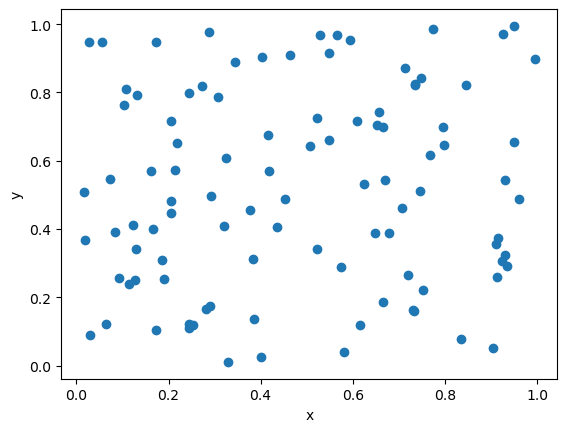

In [8]:
particles.draw(dim=2)

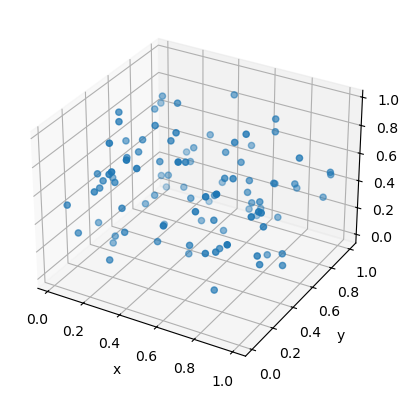

In [9]:
particles.draw(dim=3)

# Exercise 1

Implment the `Particles` class in `./nbody/particles.py`. Please make sure your Particles class has passed all the test in the above section. 

In [10]:
# TODO: test your class here







# Exercise 2

Once you have the `Particles` class implmented correctly.\
You should be able to use it to initialzie arbitry distribution of N particles.

(1) Initialize two particles that describe the Sun-Earth binary system.

(2) Initialize a 3D particle clould with N=1000 particles in a normal distrbuiotn (sigma=1) and total mass equal to 10.

Hints: use `numpy.random.randn` (see https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html). 

Initializing Sun-Earth binary system:


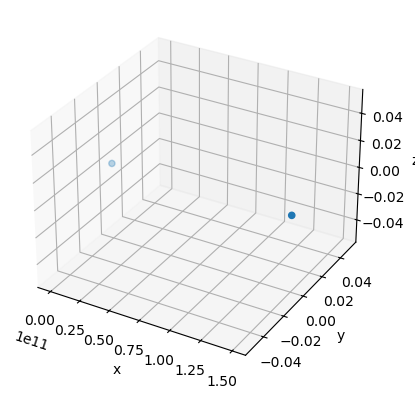

Initializing 3D particle cloud:


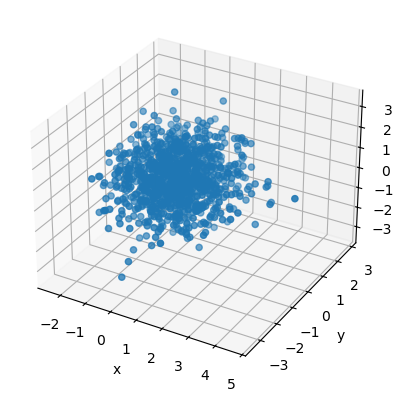

In [11]:
import numpy as np

# Assuming the Particles class from above is already available

def initialize_sun_earth_system():
    """
    Initialize two particles representing the Sun and the Earth.
    """
    # Define the number of particles (2 for Sun and Earth)
    num_particles = 2
    particles = Particles(num_particles)
    
    # Masses: Sun and Earth
    masses = np.array([1.989e30, 5.972e24])  # Sun and Earth masses in kg
    
    # Positions: Sun at the origin, Earth at 1 AU distance on the x-axis
    positions = np.array([[0, 0, 0],  # Sun
                          [1.496e11, 0, 0]])  # Earth (1 AU away from Sun)
    
    # Velocities: Sun stationary, Earth moving perpendicular to the position vector (y-axis)
    velocities = np.array([[0, 0, 0],  # Sun stationary
                           [0, 29.78e3, 0]])  # Earth's orbital velocity around the Sun (in m/s)
    
    # Accelerations: Set to zero for simplicity
    accelerations = np.zeros((num_particles, 3))
    
    # Set particle properties
    particles.masses = masses
    particles.positions = positions
    particles.velocities = velocities
    particles.accelerations = accelerations
    
    # Visualize the Sun-Earth system in 3D
    particles.draw(3)
    
    return particles


def initialize_particle_cloud(N=1000, total_mass=10):
    """
    Initialize a 3D cloud of particles with a normal distribution of positions
    and total mass equal to 10.
    """
    particles = Particles(N)
    
    # Mass distribution: each particle gets an equal fraction of the total mass
    masses = np.full(N, total_mass / N)
    
    # Positions: randomly distributed in 3D following a normal distribution (sigma=1)
    positions = np.random.randn(N, 3)  # 1000 particles in a 3D space with normal distribution
    
    # Velocities: for now, let's assume the particles are stationary
    velocities = np.zeros((N, 3))  # No initial velocity
    
    # Accelerations: let's also assume accelerations are zero initially
    accelerations = np.zeros((N, 3))
    
    # Set particle properties
    particles.masses = masses
    particles.positions = positions
    particles.velocities = velocities
    particles.accelerations = accelerations
    
    # Visualize the particle cloud in 3D
    particles.draw(3)
    
    return particles


if __name__ == "__main__":
    # Task 1: Initialize the Sun-Earth system
    print("Initializing Sun-Earth binary system:")
    sun_earth_particles = initialize_sun_earth_system()
    
    # Task 2: Initialize a 3D particle cloud with N=1000 and total mass of 10
    print("Initializing 3D particle cloud:")
    particle_cloud = initialize_particle_cloud(N=1000, total_mass=10)
